In [1]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
from matplotlib import style
from pandas import read_csv
from pandas.util.testing import assert_frame_equal
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%config IPCompleter.greedy=True

<ipython-input-1-18612e01d1bc>:17: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#using the csv data 
Airchina_df = pd.read_csv('../Resources/Air China.csv')
Lufthansa_df = pd.read_csv('../Resources/Lufthansa.csv')
American_df = pd.read_csv('../Resources/AAL.csv')
Delta_df = pd.read_csv('../Resources/Delta.csv')
Qantas_df = pd.read_csv('../Resources/Qantas.csv')

In [4]:
#using delta airlines data for the prediction
American_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,49.419998,49.419998,48.299999,48.660000,44.223190,12323200
1,2016-01-05,49.310001,49.750000,47.040001,48.570000,44.141399,14557200
2,2016-01-06,47.790001,49.299999,47.630001,48.930000,44.468582,10375900
3,2016-01-07,48.389999,48.680000,46.740002,47.000000,42.714558,11301100
4,2016-01-08,47.480000,48.950001,46.490002,46.610001,42.360115,10850300
...,...,...,...,...,...,...,...
1354,2021-05-20,46.349998,46.369999,44.910000,45.410000,45.410000,12341700
1355,2021-05-21,45.700001,46.000000,45.110001,45.209999,45.209999,9888200
1356,2021-05-24,45.570000,46.279999,45.009998,46.169998,46.169998,8409100
1357,2021-05-25,47.410000,48.160000,46.509998,46.669998,46.669998,14657000


In [6]:
#Using LSTM for Delta

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('../Resources/AAL.csv', usecols=[5], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 3
trainX, trainY = create_dataset(dataset, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
# create and fit the LSTM network
#trainX

In [7]:
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
1355/1355 [==============================] - 11s 884us/step - loss: 0.09260
Epoch 2/100
1355/1355 [==============================] - 1s 877us/step - loss: 0.0011
Epoch 3/100
1355/1355 [==============================] - 1s 873us/step - loss: 0.0012
Epoch 4/100
1355/1355 [==============================] - 1s 868us/step - loss: 8.8839e-04
Epoch 5/100
1355/1355 [==============================] - 1s 869us/step - loss: 0.0010
Epoch 6/100
1355/1355 [==============================] - 1s 870us/step - loss: 8.2989e-04
Epoch 7/100
1355/1355 [==============================] - 1s 861us/step - loss: 9.3253e-04
Epoch 8/100
1355/1355 [==============================] - 1s 863us/step - loss: 8.5888e-04
Epoch 9/100
1355/1355 [==============================] - 1s 871us/step - loss: 8.8888e-04
Epoch 10/100
1355/1355 [==============================] - 1s 870us/step - loss: 8.0140e-04
Epoch 11/100
1355/1355 [==============================] - 1s 884us/step - loss: 7.6188e-04
Epoch 12/100
1355/1355

In [7]:
# make predictions
trainPredict = model.predict(trainX[-1].reshape(1,1,3))
#testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)

[[53.32353]]


In [35]:
#By using DataReader we will get the stock quote from Yahoo Finance
Delta_df = web.DataReader('DAL', data_source = 'yahoo', start = '2019-09-09', end = '2021-03-09')
#Show the data
Delta_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-09,58.450001,57.560001,57.980000,58.110001,5740500.0,57.285614
2019-09-10,58.720001,57.799999,58.080002,58.639999,4409600.0,57.808090
2019-09-11,59.180000,58.139999,58.619999,58.779999,4163700.0,57.946106
2019-09-12,59.889999,58.779999,58.779999,59.439999,5188700.0,58.596745
2019-09-13,60.580002,59.610001,60.000000,60.009998,7548400.0,59.158653
...,...,...,...,...,...,...
2021-03-03,49.090000,48.139999,48.619999,48.349998,13642700.0,48.349998
2021-03-04,48.410000,45.320000,48.320000,46.959999,18062500.0,46.959999
2021-03-05,47.000000,43.009998,46.910000,46.209999,20611800.0,46.209999


In [36]:
#Getting the number of rows and columns in the data set
Delta_df.shape

(378, 6)

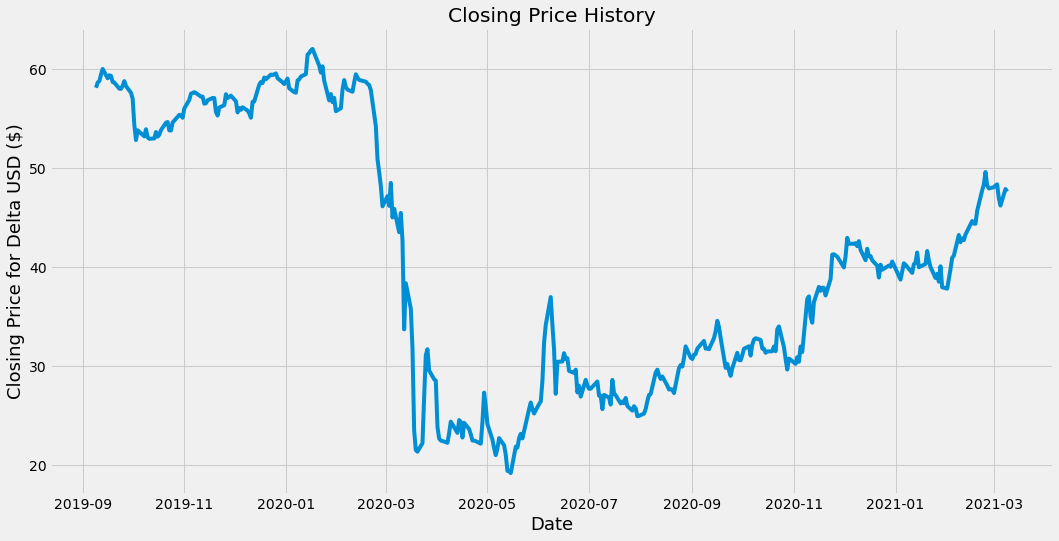

In [37]:
#Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(Delta_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price for Delta USD ($)', fontsize=18)
plt.show()

In [38]:
#Create a new dataframe with only the "Close" column
data = Delta_df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .7)

training_data_len

265

In [39]:
#Scale the data with using an ue of array with numpy
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [40]:
#Creating the training data set
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x train and y train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i, 0])
    if i<=60: 
        print(x_train)
        print(y_train)
        print()

[array([0.90849677, 0.92086836, 0.92413632, 0.93954248, 0.95284779,
       0.93090571, 0.9379085 , 0.93650799, 0.92203547, 0.92063497,
       0.90639593, 0.90592906, 0.91316532, 0.92413632, 0.91246498,
       0.89659196, 0.88281978, 0.82072828, 0.78524749, 0.8081233 ,
       0.79761908, 0.79388426, 0.81069092, 0.79154994, 0.78804859,
       0.78898232, 0.804155  , 0.79318392, 0.79785247, 0.80859017,
       0.82609717, 0.82773115, 0.8081233 , 0.80765644, 0.82656394,
       0.83986926, 0.84477129, 0.8433707 , 0.83776851, 0.85971058,
       0.8797853 , 0.89449111, 0.89612518, 0.89799255, 0.89612518,
       0.88748833, 0.88772181, 0.87091506, 0.87208217, 0.87908496,
       0.88445385, 0.88422037, 0.8515406 , 0.84313731, 0.86181143,
       0.86741362, 0.893324  , 0.88422037, 0.88982265, 0.87675072])]
[0.8503734801594105]



In [41]:
#Convering the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(205, 60, 1)

In [43]:
#Building  the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [44]:
#Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [45]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=15)

Epoch 1/15
205/205 [==============================] - 5s 14ms/step - loss: 0.0427
Epoch 2/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0055
Epoch 3/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0068
Epoch 4/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0053
Epoch 5/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0058
Epoch 6/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0060
Epoch 7/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0040
Epoch 8/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0046
Epoch 9/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0046
Epoch 10/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0037
Epoch 11/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0033
Epoch 12/15
205/205 [==============================] - 3s 14ms/step - loss: 0.0029
Epoch 13/15
2

In [46]:
#Create the data set
#Create a new array containing scaled vals from index 1543 to 2020
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [47]:
#Convert the data to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [48]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.8626475882741202

<ipython-input-49-280213edf679>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


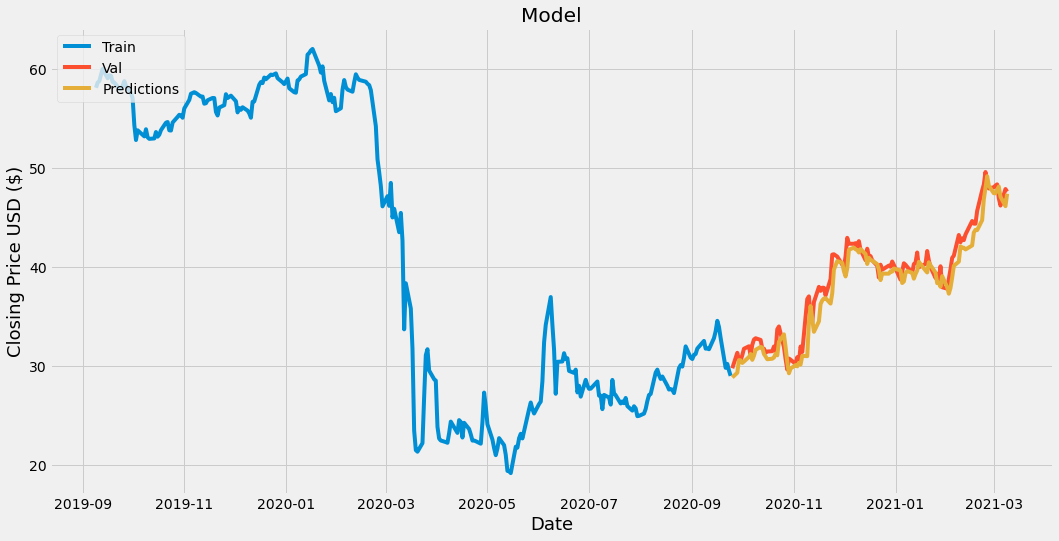

In [49]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [50]:
#showing the prediction we did and actual closing price 
valid

,Close,Predictions
Date,,
2020-09-25,29.780001,28.849791
2020-09-28,31.340000,29.327183
2020-09-29,30.610001,30.600027
2020-09-30,30.580000,30.575243
2020-10-01,31.100000,30.314499
...,...,...
2021-03-03,48.349998,47.789436
2021-03-04,46.959999,48.131706
2021-03-05,46.209999,47.109467
